In [1]:
import argparse
import numpy as np
import dsuite
import gym
from softlearning.environments.adapters.gym_adapter import GymAdapter
import os
import pickle
import skimage
import matplotlib.pyplot as plt

In [ ]:
cur_dir = os.path.dirname(os.path.realpath(__file__))
directory = cur_dir + "/free_screw_180"

if not os.path.exists(directory):
    os.makedirs(directory)

In [37]:
num_positives = 0
observations = []

env_kwargs = {
    'camera_settings': {
        'distance': 0.35,
        'elevation': -15,
        'lookat': (0, 0, 0.05),
    },
    'init_qpos_range': (
        (0, 0, 0.1, -np.pi, -np.pi, -np.pi),
        (0, 0, 0.1, np.pi, np.pi, np.pi),
    ),
    'target_qpos_range': (
        (0, 0, 0.05, 0, 0, 0),
        (0, 0, 0.05, 0, 0, 0)
    ),
    'observation_keys': (
        'claw_qpos',
        'last_action',
        'object_position',
        'object_quaternion',
    ),
    'initial_claw_qpos': np.array([0, -np.pi / 6, np.pi / 2] * 3),
    'reward_keys_and_weights': {'sparse_position_reward': 1},
}
env = GymAdapter(
    domain='DClaw',
    task='LiftDDFixed-v0',
    **env_kwargs
)

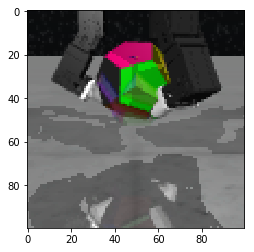

0.0


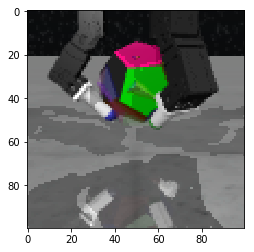

0.0


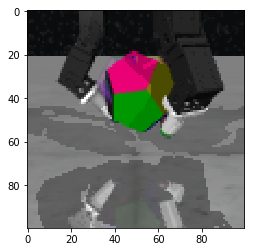

0.0


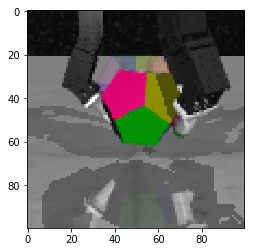

0.0


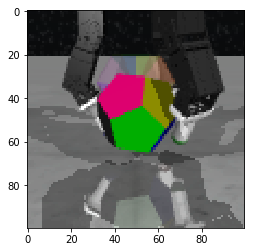

-1.0


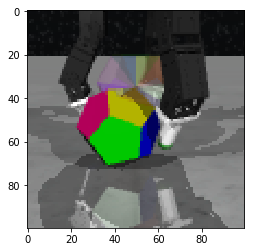

-1.0


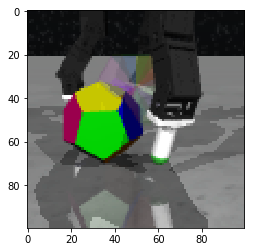

-1.0


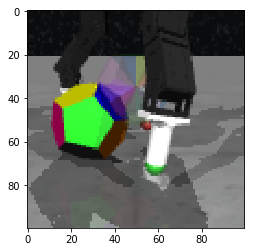

-1.0


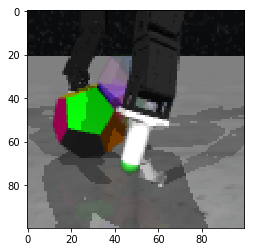

-1.0


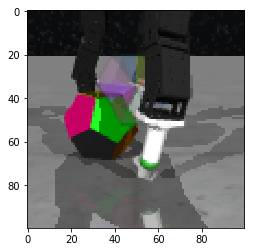

-1.0


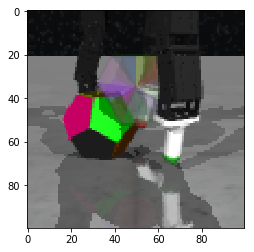

In [38]:
env.reset()
plt.imshow(env.render(mode='rgb_array'))
plt.show()
for _ in range(10):
    s, r, d, _ = env.step(env.action_space.sample())
    print(r)
    plt.imshow(env.render(mode='rgb_array'))
    plt.show()

Resetting environment...


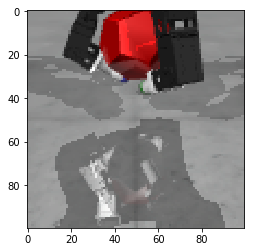

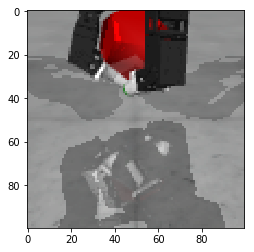

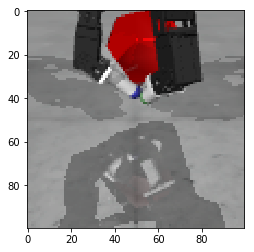

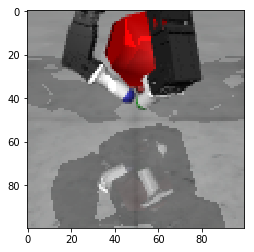

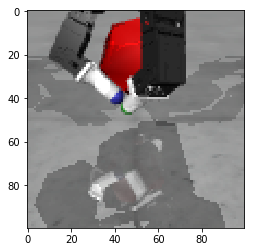

Resetting environment...


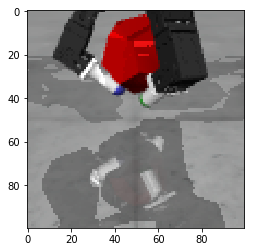

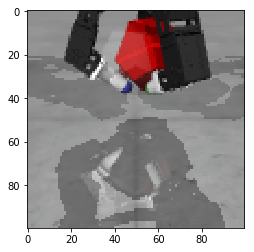

Resetting environment...


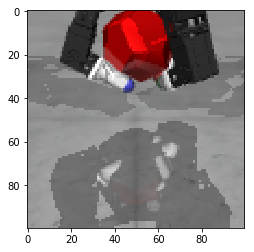

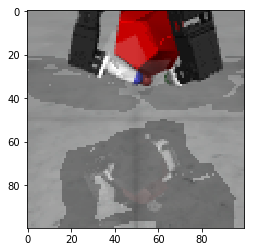

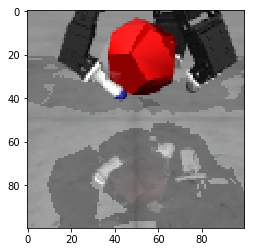

Resetting environment...


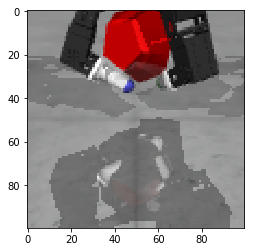

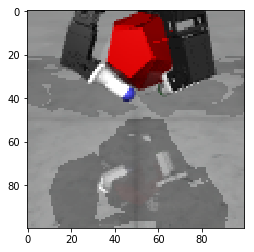

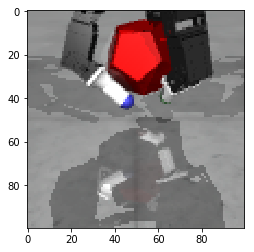

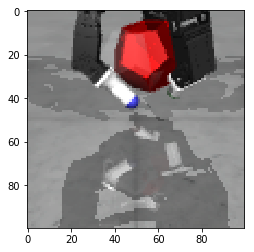

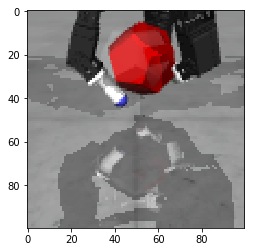

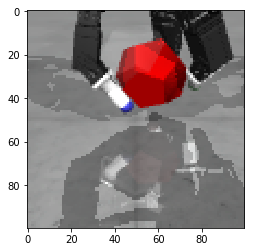

In [15]:
NUM_TOTAL_EXAMPLES = 10
max_rollout_length = 25

while num_positives <= NUM_TOTAL_EXAMPLES:
    obs = env.reset()
    print("Resetting environment...")
    t = 0
    obs, r, _, _ = env.step(env.action_space.sample())
    while r == 0 and t <= max_rollout_length:
        if r == 0:
            observations.append(obs)
            num_positives += 1
            plt.imshow(env.render(mode='rgb_array'))
            plt.show()    
        obs, r, _, _ = env.step(env.action_space.sample())
        
goal_examples = {
    key: np.concatenate([
        obs[key][None] for obs in observations
    ], axis=0)
    for key in observations[0].keys()
}

In [12]:
goal_examples['object_position']

array([[ 0.        ,  0.        ,  0.1       ],
       [ 0.00496934, -0.0030933 ,  0.11344496],
       [ 0.00820562,  0.00234654,  0.10359109],
       [ 0.00586204,  0.00203996,  0.061016  ],
       [ 0.        ,  0.        ,  0.1       ],
       [ 0.01123908,  0.01362388,  0.10713834],
       [ 0.0168396 ,  0.02293574,  0.08226796],
       [ 0.        ,  0.        ,  0.1       ],
       [-0.00728674,  0.00300354,  0.11717331],
       [-0.01153127,  0.00590628,  0.10763737],
       [-0.00056159,  0.02279024,  0.09699175]])